# Наивный байесовский классификатор

Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [первой работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import data_retrieve as dr
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

#### Разбиение на обучающую и тестовую выборки

In [3]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
print(N_train, N_test)

122 53


#### Инициализация

In [4]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)

GaussianNB(priors=None)

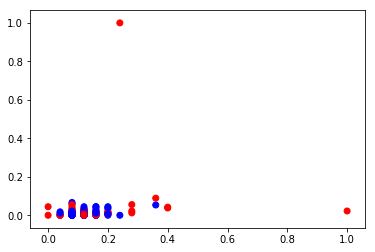

In [5]:
import mysk

vX = X_train.values
colors = np.array(['b', 'r'])[intY]
plt.scatter(vX[:, 0], vX[:, 1], color = colors)
# mysk.draw_sep_curve(gnb_model)
# plt.scatter(gnb_model.theta_[:, 0], gnb_model.theta_[:, 40], color = ['b', 'r'], s = 100)

#### Средние значения признаков в получившейся модели для заданных классов

In [6]:
gnb_model.theta_

array([[ 0.12333333,  0.01308642,  0.        ,  0.        ,  0.77777778,
         0.19444444,  0.01388889,  0.        ,  0.01388889,  0.09722222,
         0.48611111,  0.41666667,  0.69444444,  0.04166667,  0.20833333,
         0.05555556,  0.16666667,  0.19444444,  0.38888889,  0.25      ,
         0.81944444,  0.        ,  0.18055556,  0.20833333,  0.18055556,
         0.        ,  0.41666667,  0.04166667,  0.01388889,  0.02777778,
         0.05555556,  0.        ,  0.        ,  0.04166667,  0.01388889,
         0.77777778,  0.01388889,  0.01388889,  0.09722222,  0.01388889,
         0.65277778],
       [ 0.1624    ,  0.03806844,  0.02      ,  0.02      ,  0.56      ,
         0.3       ,  0.08      ,  0.02      ,  0.        ,  0.06      ,
         0.32      ,  0.62      ,  0.76      ,  0.        ,  0.2       ,
         0.04      ,  0.14      ,  0.3       ,  0.36      ,  0.2       ,
         0.82      ,  0.        ,  0.18      ,  0.2       ,  0.08      ,
         0.02      ,  0.5    

#### Ошибки

In [7]:
err_train = np.mean(Y_train != gnb_model.predict(X_train))
err_test = np.mean(Y_test != gnb_model.predict(X_test))
print(err_train, err_test)

0.524590163934 0.433962264151


In [8]:
gnb_model.sigma_

array([[  2.78888914e-03,   2.54671794e-04,   2.50000000e-10,
          2.50000000e-10,   1.72839506e-01,   1.56635803e-01,
          1.36959879e-02,   2.50000000e-10,   1.36959879e-02,
          8.77700620e-02,   2.49807099e-01,   2.43055556e-01,
          2.12191358e-01,   3.99305558e-02,   1.64930556e-01,
          5.24691361e-02,   1.38888889e-01,   1.56635803e-01,
          2.37654321e-01,   1.87500000e-01,   1.47955247e-01,
          2.50000000e-10,   1.47955247e-01,   1.64930556e-01,
          1.47955247e-01,   2.50000000e-10,   2.43055556e-01,
          3.99305558e-02,   1.36959879e-02,   2.70061731e-02,
          5.24691361e-02,   2.50000000e-10,   2.50000000e-10,
          3.99305558e-02,   1.36959879e-02,   1.72839506e-01,
          1.36959879e-02,   1.36959879e-02,   8.77700620e-02,
          1.36959879e-02,   2.26658951e-01],
       [  2.19142403e-02,   1.92086952e-02,   1.96000002e-02,
          1.96000002e-02,   2.46400000e-01,   2.10000000e-01,
          7.36000003e-02,

In [9]:
print("Class counts: ", gnb_model.class_count_)
print("Priors: ", gnb_model.class_prior_)

Class counts:  [ 72.  50.]
Priors:  [ 0.59016393  0.40983607]


### Confusion matrix, специфичность, чувствительность

Confusion matrix имеет вид (для двух классов):
$
\begin{array}{|c|c|}
\hline
{\rm TN} & {\rm FN} \\
\hline
{\rm FP} & {\rm TP} \\
\hline
\end{array}
$

${\rm TN}$ – true negative
${\rm FP}$ – false positive
${\rm FN}$ – false negative
${\rm TP}$ – true positive


${\rm FP}$ – _ложные тревоги_ (ошибки 1-го рода или $\alpha$-ошибки)

${\rm FN}$ – _промахи_ (ошибки 2-го рода или $\beta$-ошибки)

$\alpha = {\rm FPR} = \frac{{\rm FP}}{{\rm TN}+{\rm FP}}$ – вероятность ошибки первого рода (_уровень значимости_)

$\beta = {\rm FNR} = \frac{{\rm FN}}{{\rm FN}+{\rm TP}}$ – вероятность ошибки второго рода

${\rm TNR} = \frac{{\rm TN}}{{\rm TN}+{\rm FP}} = 1 - {\rm FPR}$ – _специфичность_

${\rm TPR} = {\rm recall} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}} = 1 - {\rm FNR}$ – _чувствительность_


Еще:

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ 

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 


#### Использование различных классификаторов

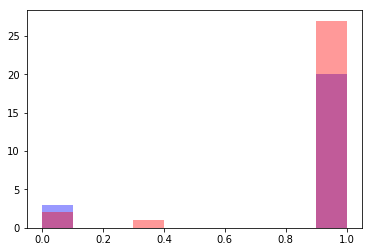

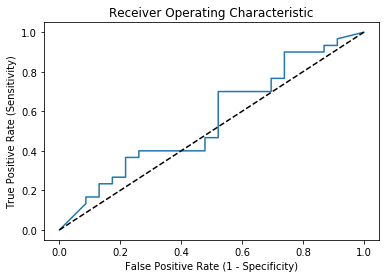

In [11]:
from ipywidgets import interact


defines = {
    'gaussian': {
        'ctor': GaussianNB,
        'priors': True
    },
    'bernoulli': {
        'ctor': BernoulliNB,
        'priors': False
    },
    'multinomial': {
        'ctor': MultinomialNB,
        'priors': False
    }
}

_, n_features = X.shape
intY_test = pd.Series([0 if val is 'C1' else 1 for val in Y_test])
def print_svc_data(model='gaussian', graph='hist'):
    model_defines = defines[model]
    nb_model = model_defines['ctor']()
    nb_model.fit(X_train, Y_train)
    Y_train_predict = nb_model.predict(X_train)
    Y_test_predict = nb_model.predict(X_test)
    err_train = np.mean(Y_train != Y_train_predict)
    err_test = np.mean(Y_test != Y_test_predict)
    print(f"Errors: train - {err_train} | test - {err_test}")
    print("Class counts: ", nb_model.class_count_)
    if model_defines['priors']:
        print("Priors: ", nb_model.class_prior_)
        pass
    from sklearn.metrics import confusion_matrix
    cm_train = confusion_matrix(Y_train_predict, Y_train)
    print("Train data Confusion Matrix:\n", cm_train)
    cm_test = confusion_matrix(Y_test_predict, Y_test)
    print("Test data Confusion Matrix:\n", cm_test)
    
    tnr_tr = 1 - float(cm_train[1, 0])/(cm_train[0, 0] + cm_train[1, 0])
    tpr_tr = 1 - float(cm_train[0, 1])/(cm_train[0, 1] + cm_train[1, 1])
    print(f"Train data: Specificity={tnr_tr} | Sensitivity={tpr_tr}")
    tnr_tst = 1 - float(cm_test[1, 0])/(cm_test[0, 0] + cm_test[1, 0])
    tpr_tst = 1 - float(cm_test[0, 1])/(cm_test[0, 1] + cm_test[1, 1])
    print(f"Test data: Specificity={tnr_tst} | Sensitivity={tpr_tst}")
    probability = nb_model.predict_proba(X_test)[:, 1]
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(intY_test, probability)
    print("                   Test data:\n")
    if graph is 'hist':
        plt.hist(probability[Y_test == 'C1'], color = 'b', alpha = 0.4, normed = False)
        plt.hist(probability[Y_test == 'C2'], color = 'r', alpha = 0.4, normed = False)
        pass
    else:
        from sklearn.metrics import roc_curve
        fpr, tpr, thresholds = roc_curve(intY_test, probability)
        plt.title('Receiver Operating Characteristic')
        plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
        #plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.axis([-0.05, 1.05, -0.05, 1.05])
        pass
    from sklearn.metrics import auc
    print("Area Under Curve: ", auc(fpr, tpr))
    pass

interact(print_svc_data, model=defines.keys(), graph=['hist', 'roc'])
pass